In [1189]:
pip install statsmodels, matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'statsmodels,'


In [1190]:
import pandas as pd # import pandas library to work with DataFrames
import numpy as np # import numpy library to work with numerical python funcitons such as sqrt and mean
import statsmodels.api as sm # import statsmodels.api library to work with time series

import warnings 
warnings.filterwarnings("ignore") # We would like to ignore warnings for now

import matplotlib.pyplot as plt # import matplotlib.pyplot library to plot figures
plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2') # you can use this style if you like!

In [1191]:
demand_data = pd.read_csv('CS5-train.csv', header=0, index_col=0,parse_dates=True)

# header=0 tells python that in the csv file, the first row is the header. Remember that Python always counts from 0.
# index_col=0 tells python that in the csv file, the first column is the index column. 
# We need to set the index column to be be able to work with time series
# parse_dates = True tells Python to read the index column using a date format

In [1192]:
demand_data[demand_data.store_nbr == 22].head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
462,2013-01-01,22,AUTOMOTIVE,0.0,0
463,2013-01-01,22,BABY CARE,0.0,0
464,2013-01-01,22,BEAUTY,0.0,0
465,2013-01-01,22,BEVERAGES,0.0,0
466,2013-01-01,22,BOOKS,0.0,0


In [1358]:
demand_data[demand_data.store_nbr == 22].tail(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
2999591,2017-08-15,22,MAGAZINES,4.00000,0
2999592,2017-08-15,22,MEATS,141.74900,0
2999593,2017-08-15,22,PERSONAL CARE,112.00000,6
2999594,2017-08-15,22,PET SUPPLIES,0.00000,0
2999595,2017-08-15,22,PLAYERS AND ELECTRONICS,4.00000,0
2999596,2017-08-15,22,POULTRY,131.07399,0
2999597,2017-08-15,22,PREPARED FOODS,31.00000,0
2999598,2017-08-15,22,PRODUCE,634.96500,98
2999599,2017-08-15,22,SCHOOL AND OFFICE SUPPLIES,8.00000,4


In [1372]:
demand_data[demand_data.store_nbr == 22].describe()

,store_nbr,sales,onpromotion
count,55572.0,55572.000000,55572.000000
mean,22.0,73.601845,1.791244
std,0.0,316.225353,8.438331
min,22.0,0.000000,0.000000
25%,22.0,0.000000,0.000000
50%,22.0,0.000000,0.000000
75%,22.0,4.000000,0.000000
max,22.0,8909.000000,130.000000


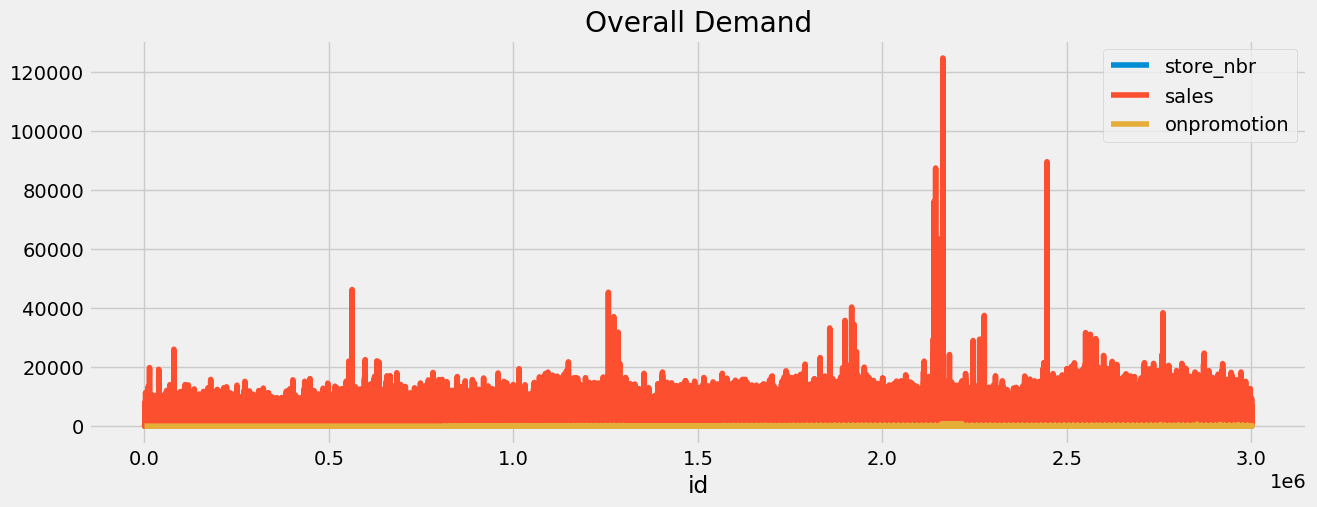

In [1375]:
demand_data.plot(figsize=(14,5))
#plt.ylim(top=2000)
#plt.ylim(bottom=0)
#plt.gcf().subplots_adjust(bottom=0.15)
plt.title('Overall Demand')
plt.savefig("timeseries_plot1.pdf", dpi=600) # this saves the figure as a pdf file
plt.show()

In [1195]:
demand_data[demand_data.store_nbr == 22].info()

<class 'pandas.core.frame.DataFrame'>
Index: 55572 entries, 462 to 2999600
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         55572 non-null  object 
 1   store_nbr    55572 non-null  int64  
 2   family       55572 non-null  object 
 3   sales        55572 non-null  float64
 4   onpromotion  55572 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ MB


In [1198]:
az=demand_data[demand_data['store_nbr']==22]

In [1199]:
az.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
462,2013-01-01,22,AUTOMOTIVE,0.0,0
463,2013-01-01,22,BABY CARE,0.0,0
464,2013-01-01,22,BEAUTY,0.0,0
465,2013-01-01,22,BEVERAGES,0.0,0
466,2013-01-01,22,BOOKS,0.0,0


In [1200]:
az['family'].nunique()

33

In [1201]:
az.groupby('family')['sales'].mean()

family
AUTOMOTIVE                      2.183492
BABY CARE                       0.116390
BEAUTY                          0.623515
BEVERAGES                     509.435273
BOOKS                           0.000000
BREAD/BAKERY                   53.785629
CELEBRATION                     3.608076
CLEANING                      247.299881
DAIRY                         120.821259
DELI                           64.901425
EGGS                           21.008314
FROZEN FOODS                   29.505787
GROCERY I                     932.459803
GROCERY II                      2.328979
HARDWARE                        0.414489
HOME AND KITCHEN I             15.976247
HOME AND KITCHEN II             7.595012
HOME APPLIANCES                 0.135392
HOME CARE                      62.921021
LADIESWEAR                      0.207838
LAWN AND GARDEN                 0.007126
LINGERIE                        2.839074
LIQUOR,WINE,BEER               13.697150
MAGAZINES                       1.137173
MEATS    

In [1202]:
ass =az[az['family']=='GROCERY I']

In [1203]:
ass.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
474,2013-01-01,22,GROCERY I,0.0,0
2256,2013-01-02,22,GROCERY I,0.0,0
4038,2013-01-03,22,GROCERY I,0.0,0
5820,2013-01-04,22,GROCERY I,0.0,0
7602,2013-01-05,22,GROCERY I,0.0,0


In [1204]:
ass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1684 entries, 474 to 2999580
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1684 non-null   object 
 1   store_nbr    1684 non-null   int64  
 2   family       1684 non-null   object 
 3   sales        1684 non-null   float64
 4   onpromotion  1684 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 78.9+ KB


In [1359]:
ass.date = pd.to_datetime(ass.date)

In [1360]:
import pandas as pd

# Assuming you have a larger DataFrame named 'original_dataframe'
# Subsetting 'date' and 'sales' columns
df = ass[['date', 'sales']]

# Converting the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Setting 'date' as the index with a specified frequency (e.g., 'D' for daily)
df.set_index('date', inplace=True)
# df.index.freq = 'D'  # 'D' stands for daily frequency

# You can replace 'D' with the appropriate frequency code if your data has a different frequency (e.g., 'M' for monthly).

# Now you have explicitly set the frequency for the datetime index.
# You can perform your time series analysis with the known frequency.


In [1207]:
df.head()

,sales
date,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0


In [1361]:
df = df.resample('M').asfreq()

df.index.freq = 'M'


In [1209]:
null_indexes = df[df['sales'].isnull()].index
print(null_indexes)




DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', name='date', freq=None)


In [1210]:
dates_to_update = pd.DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'])
df.loc[dates_to_update, 'sales'] = 1


In [1211]:
df.head()

,sales
date,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0


In [1212]:
df1=df.copy()

In [1213]:
# Assuming df is your original DataFrame
df_new = df.loc['2015-09-01':'2017-01-01']


In [1214]:
df1['sales'] = df1['sales'].replace(0, 1)
df_new1 = df1.loc['2015-09-01':'2017-01-01']

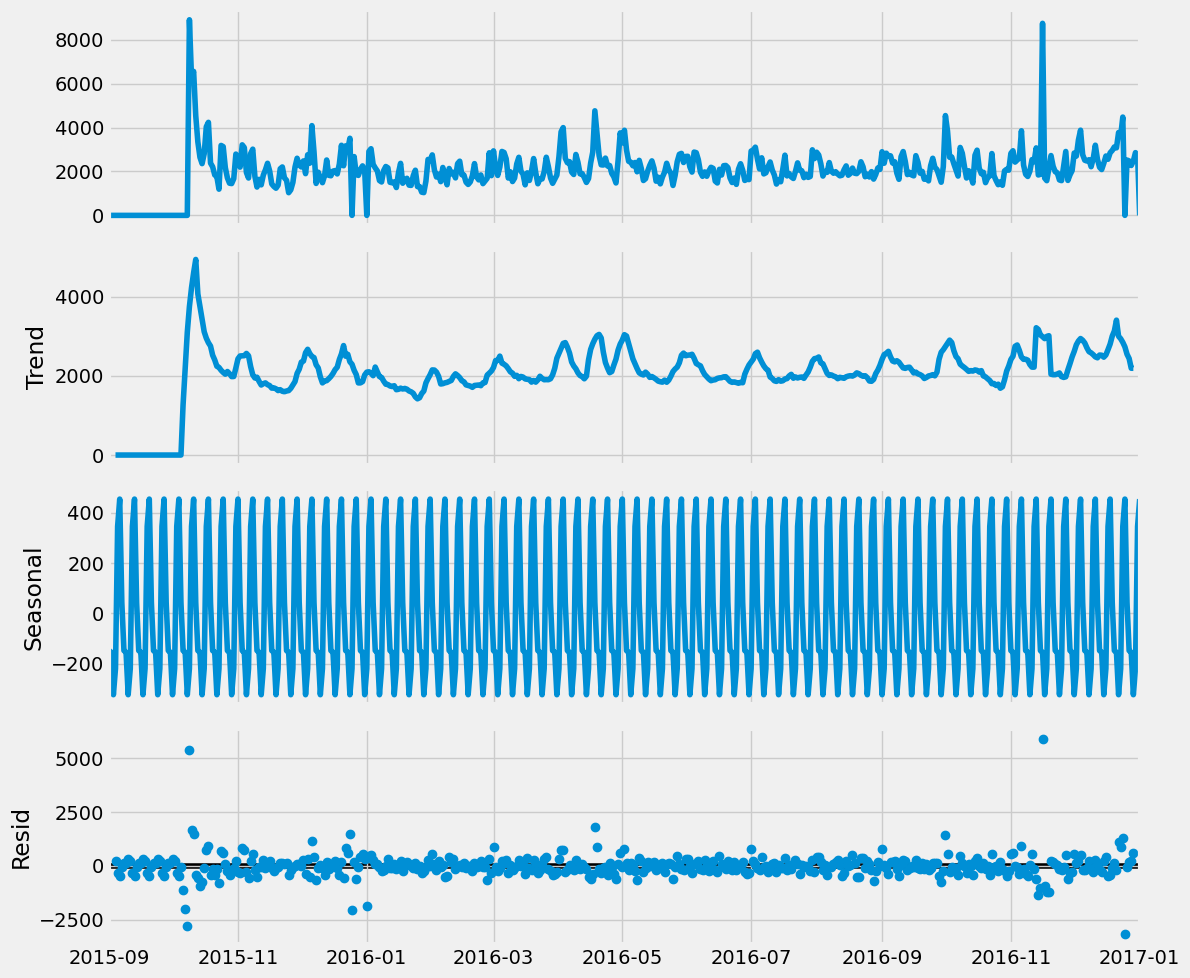

In [1215]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library

result = seasonal_decompose(df_new, model='additive')
#result = seasonal_decompose(df_new1, model='multiplicative')

from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 10

result.plot() # this generates the plot of result

#plt.savefig("demand_decomposed.pdf", dpi=600)
plt.show() # this shows the plot

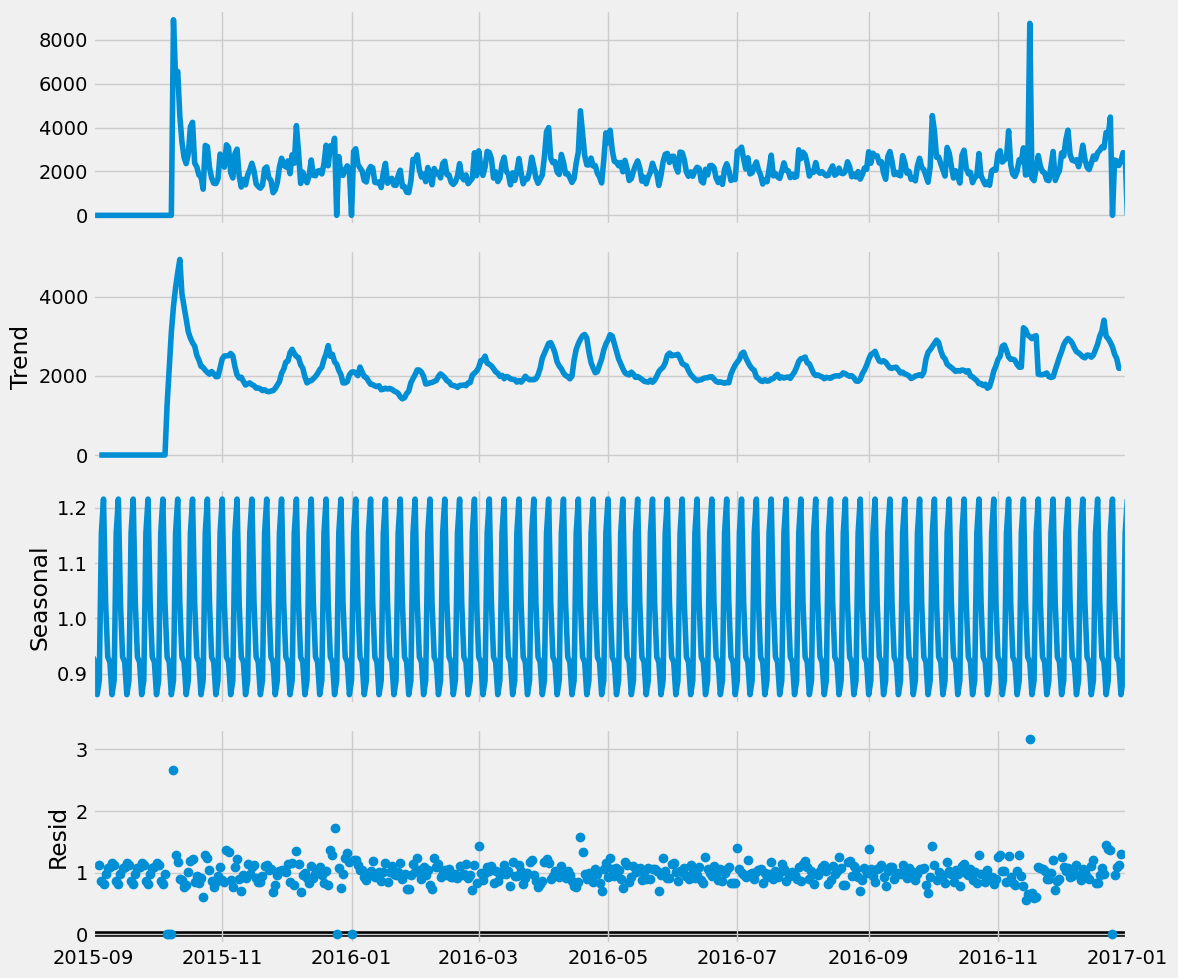

In [1216]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library

#result = seasonal_decompose(df_new, model='additive')
result = seasonal_decompose(df_new1, model='multiplicative')

from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 10

result.plot() # this generates the plot of result

#plt.savefig("demand_decomposed.pdf", dpi=600)
plt.show() # this shows the plot

<Axes: xlabel='date', ylabel='sales'>

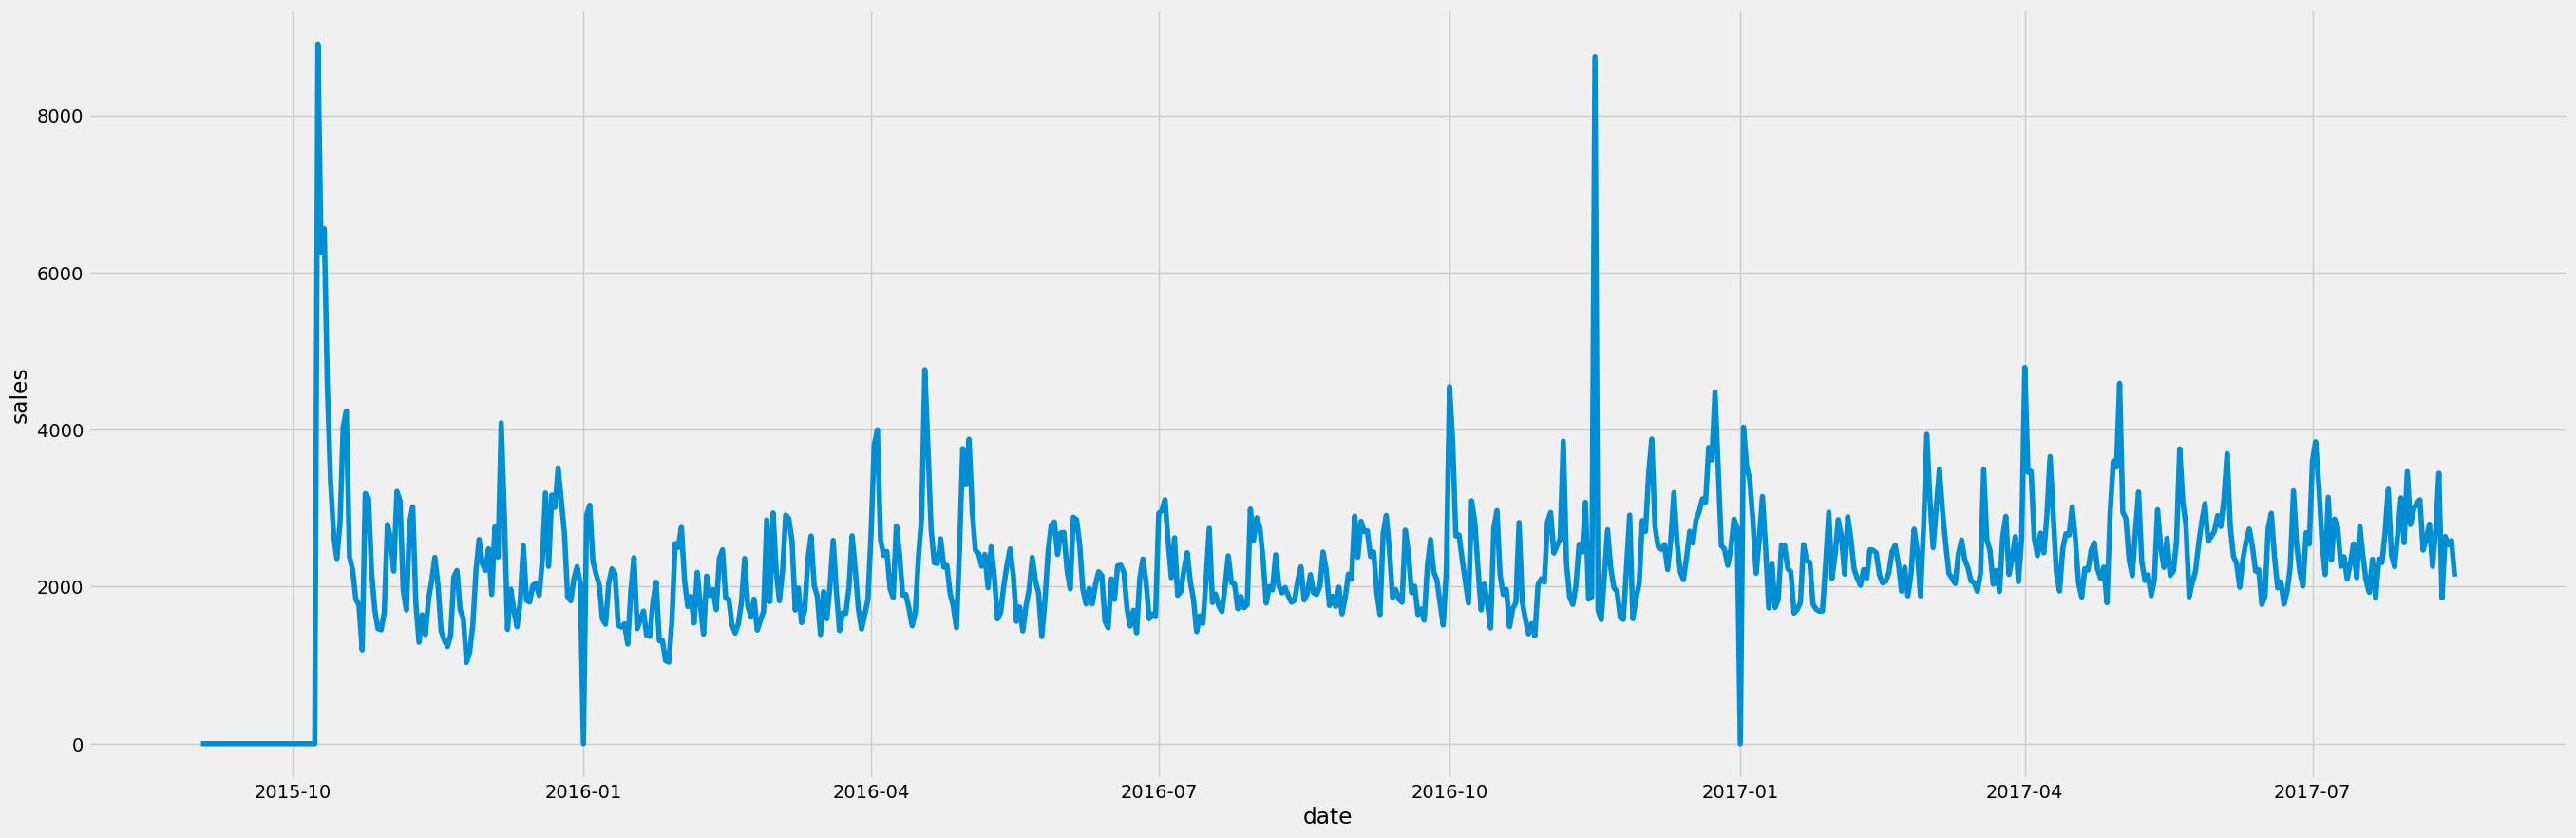

In [1217]:
#plt.figsize(12,10)
plt.figure(figsize=(30,10))

sns.lineplot(x='date',y='sales',data=ass[ass.date>'2015-09-01'])

In [1218]:
forcast_Oct_MA2 = df_new["sales"][-2:].mean()
print("Moving Average forecast with window size of 4 for October 2016 is equal to {:0.1f}.".format(forcast_Oct_MA4))

Moving Average forecast with window size of 4 for October 2016 is equal to 2021.4.


In [1219]:
# Assuming df is your original DataFrame
df_new = df.loc['2013-01-01':'2016-12-31']
forcast_Oct_MA2= df_new["sales"][-2:].mean()
print("Moving Average forecast with window size of 4 for december 2016 is equal to {:0.1f}.".format(forcast_Oct_MA4))

Moving Average forecast with window size of 4 for december 2016 is equal to 2021.4.


In [1220]:
#demand_data.rename(columns={"Passengers": "Demand"}, inplace=True)

df_new_MA = df_new.loc['2013-01-01':'2016-12-31'] 
# below we create three new columns
df_new_MA['MA2']  = df_new.sales.rolling(2).mean().shift() # shift is used to ensure that we use the average to forecast the next period's demand 
df_new_MA['MA6']  = df_new.sales.rolling(6).mean().shift()
df_new_MA['MA8'] = df_new.sales.rolling(8).mean().shift()

In [1357]:
kl=pd.read_csv('C:\Users\Praneeth\Desktop\imcs python\CS5-train')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3332986585.py, line 1)

In [1221]:
df_new_MA.tail(45)

,sales,MA2,MA6,MA8
date,,,,
2016-11-17,1699.000,5309.0000,3419.000000,3037.375000
2016-11-18,1580.000,5223.0000,3278.833333,3028.125000
2016-11-19,2137.000,1639.5000,3135.500000,2974.125000
2016-11-20,2725.000,1858.5000,2979.166667,2923.750000
2016-11-21,2237.000,2431.0000,3126.500000,2959.375000
2016-11-22,1989.000,2481.0000,3187.500000,2854.625000
2016-11-23,1937.000,2113.0000,2061.166667,2873.125000
2016-11-24,1614.000,1963.0000,2100.833333,2881.375000
2016-11-25,1582.000,1775.5000,2106.500000,1989.750000


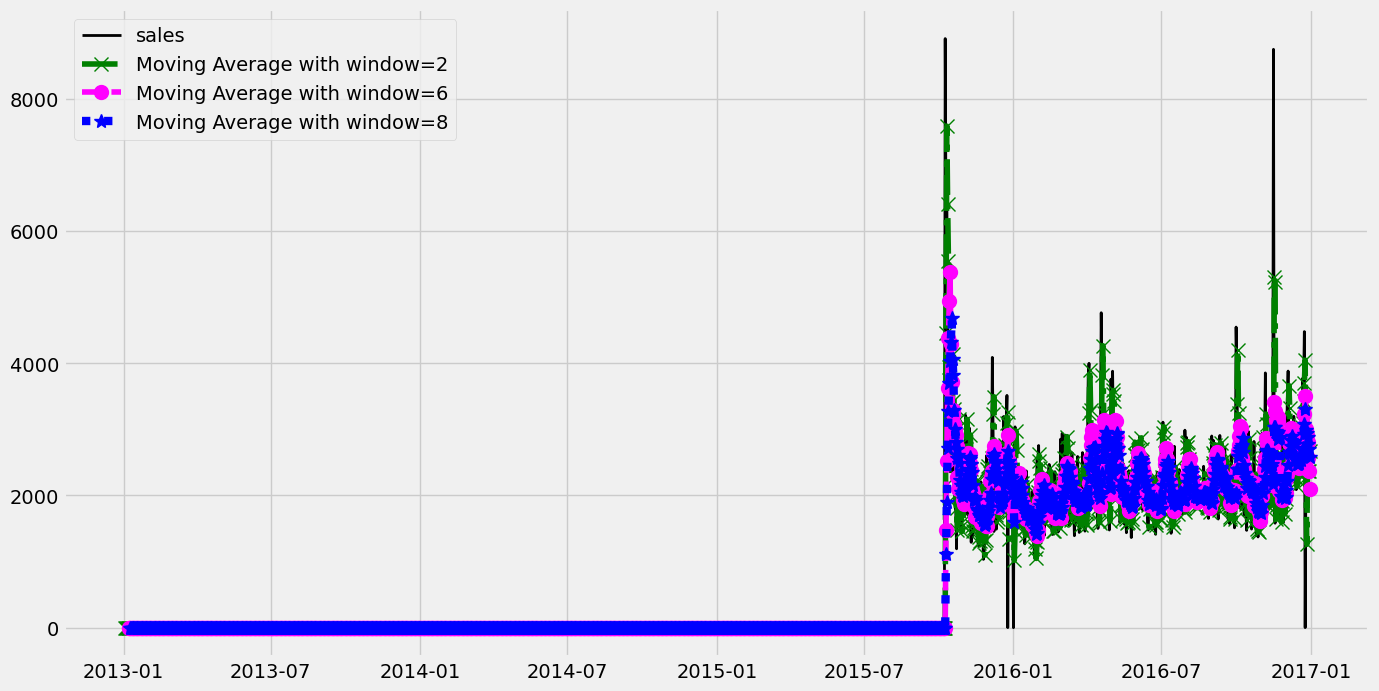

In [1222]:
plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(df_new_MA['sales'],label='sales', color='black',linewidth=2)
plt.plot(df_new_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(df_new_MA['MA6'],label='Moving Average with window=6',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(df_new_MA['MA8'],label='Moving Average with window=8',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)

plt.legend(loc=2)
plt.show()

In [1223]:
df_new_MA

,sales,MA2,MA6,MA8
date,,,,
2013-01-01,0.000,NaN,NaN,NaN
2013-01-02,0.000,NaN,NaN,NaN
2013-01-03,0.000,0.0000,NaN,NaN
2013-01-04,0.000,0.0000,NaN,NaN
2013-01-05,0.000,0.0000,NaN,NaN
...,...,...,...,...
2016-12-27,2479.516,1260.7010,2910.601333,2942.516625
2016-12-28,2272.151,2499.9590,2811.093000,2882.704375
2016-12-29,2475.973,2375.8335,2560.900500,2776.909375


In [1224]:
df_new_MA.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq='D')

In [1225]:
df_new

,sales
date,
2013-01-01,0.000
2013-01-02,0.000
2013-01-03,0.000
2013-01-04,0.000
2013-01-05,0.000
...,...
2016-12-27,2479.516
2016-12-28,2272.151
2016-12-29,2475.973


In [1226]:
df_new.loc['2016-01-01': '2016-12-01']

,sales
date,
2016-01-01,0.0
2016-01-02,2912.0
2016-01-03,3037.0
2016-01-04,2325.0
2016-01-05,2160.0
...,...
2016-11-27,2911.0
2016-11-28,1592.0
2016-11-29,1847.0


In [1227]:
temp = df_new.loc['2016-01-01': '2016-12-01'].groupby(df_new.loc['2016-01-01': '2016-12-01'].index.month)['sales'].sum().reset_index()
temp['sales']

0     54763.0
1     54722.0
2     63037.0
3     75289.0
4     69651.0
5     60393.0
6     66417.0
7     63422.0
8     66081.0
9     68490.0
10    73789.0
11     2840.0
Name: sales, dtype: float64

In [1228]:
temp = df_new.loc['2015-01-01': '2015-12-01'].groupby(df_new.loc['2015-01-01': '2015-12-01'].index.month)['sales'].sum()
temp

date
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10    72664.0
11    58801.0
12     2206.0
Name: sales, dtype: float64

In [1229]:
temp = df_new.loc['2016-01-01': '2016-12-01'].groupby(df_new.loc['2016-01-01': '2016-12-01'].index.month)['sales'].sum().reset_index()
sales_2016 = temp['sales']
sales_2016.rename({"sales": "Year 2016"}, inplace=True)
sales_2016= sales_2016.reset_index(drop=True)
sales_2016

0     54763.0
1     54722.0
2     63037.0
3     75289.0
4     69651.0
5     60393.0
6     66417.0
7     63422.0
8     66081.0
9     68490.0
10    73789.0
11     2840.0
Name: sales, dtype: float64

In [1230]:

sales_2016 = df_new.loc['2016-01-01': '2016-12-01']
temp = df_new.loc['2016-01-01': '2016-12-01'].groupby(df_new.loc['2016-01-01': '2016-12-01'].index.month)['sales'].sum().reset_index()
temp.rename(columns={"sales": "Year 2016"}, inplace=True)
sales_2016 = temp['Year 2016']
sales_2016 = sales_2016.reset_index(drop=True)

sales_2015 = df_new.loc['2015-01-01': '2015-12-01']
temp = df_new.loc['2015-01-01': '2015-12-01'].groupby(df_new.loc['2015-01-01': '2015-12-01'].index.month)['sales'].sum().reset_index()
temp.rename(columns={"sales": "Year 2015"}, inplace=True)
sales_2015 = temp['Year 2015']
sales_2015 = sales_2015.reset_index(drop=True)


sales_2014 = df_new.loc['2014-01-01': '2014-12-01']
temp = df_new.loc['2014-01-01': '2014-12-01'].groupby(df_new.loc['2014-01-01': '2014-12-01'].index.month)['sales'].sum().reset_index()
temp.rename(columns={"sales": "Year 2014"}, inplace=True)
sales_2014 = temp['Year 2014']
sales_2014 = sales_2014.reset_index(drop=True)

sales_2013 = df_new.loc['2013-01-01': '2013-12-01']
temp = df_new.loc['2013-01-01': '2013-12-01'].groupby(df_new.loc['2013-01-01': '2013-12-01'].index.month)['sales'].sum().reset_index()
temp.rename(columns={"sales": "Year 2013"}, inplace=True)
sales_2013 = temp['Year 2013']
sales_2013 = sales_2013.reset_index(drop=True)


In [1231]:
sales_2013

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: Year 2013, dtype: float64

In [1232]:
d = {"Month":['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}
dr = pd.DataFrame(data = d)

sales_table = pd.concat([dr, sales_2013, sales_2014, sales_2015, sales_2016],axis=1)
sales_table.set_index(["Month"], inplace=True)
sales_table

,Year 2013,Year 2014,Year 2015,Year 2016
Month,,,,
Jan,0.0,0.0,0.0,54763.0
Feb,0.0,0.0,0.0,54722.0
Mar,0.0,0.0,0.0,63037.0
Apr,0.0,0.0,0.0,75289.0
May,0.0,0.0,0.0,69651.0
Jun,0.0,0.0,0.0,60393.0
Jul,0.0,0.0,0.0,66417.0
Aug,0.0,0.0,0.0,63422.0
Sep,0.0,0.0,0.0,66081.0


In [1233]:
sales_table["average"] = sales_table.mean(axis = 1)
average_all = average_all = sales_table[['Year 2013', 'Year 2014', 'Year 2015', 'Year 2016']].mean().mean()
sales_table["S Index"] = sales_table["average"]/average_all
sales_table

,Year 2013,Year 2014,Year 2015,Year 2016,average,S Index
Month,,,,,,
Jan,0.0,0.0,0.0,54763.0,13690.75,0.770799
Feb,0.0,0.0,0.0,54722.0,13680.50,0.770222
Mar,0.0,0.0,0.0,63037.0,15759.25,0.887257
Apr,0.0,0.0,0.0,75289.0,18822.25,1.059706
May,0.0,0.0,0.0,69651.0,17412.75,0.980350
Jun,0.0,0.0,0.0,60393.0,15098.25,0.850042
Jul,0.0,0.0,0.0,66417.0,16604.25,0.934831
Aug,0.0,0.0,0.0,63422.0,15855.50,0.892676
Sep,0.0,0.0,0.0,66081.0,16520.25,0.930102


In [1234]:
print(sales_table["S Index"].sum())

11.999999999999998


In [1235]:
sales_table["deseason 2013"] = sales_table["Year 2013"]/sales_table["S Index"]
sales_table["deseason 2014"] = sales_table["Year 2014"]/sales_table["S Index"]
sales_table["deseason 2015"] = sales_table["Year 2015"]/sales_table["S Index"]
sales_table["deseason 2016"] = sales_table["Year 2016"]/sales_table["S Index"]
sales_table

,Year 2013,Year 2014,Year 2015,Year 2016,average,S Index,deseason 2013,deseason 2014,deseason 2015,deseason 2016
Month,,,,,,,,,,
Jan,0.0,0.0,0.0,54763.0,13690.75,0.770799,0.0,0.0,0.000000,71047.083333
Feb,0.0,0.0,0.0,54722.0,13680.50,0.770222,0.0,0.0,0.000000,71047.083333
Mar,0.0,0.0,0.0,63037.0,15759.25,0.887257,0.0,0.0,0.000000,71047.083333
Apr,0.0,0.0,0.0,75289.0,18822.25,1.059706,0.0,0.0,0.000000,71047.083333
May,0.0,0.0,0.0,69651.0,17412.75,0.980350,0.0,0.0,0.000000,71047.083333
Jun,0.0,0.0,0.0,60393.0,15098.25,0.850042,0.0,0.0,0.000000,71047.083333
Jul,0.0,0.0,0.0,66417.0,16604.25,0.934831,0.0,0.0,0.000000,71047.083333
Aug,0.0,0.0,0.0,63422.0,15855.50,0.892676,0.0,0.0,0.000000,71047.083333
Sep,0.0,0.0,0.0,66081.0,16520.25,0.930102,0.0,0.0,0.000000,71047.083333


In [1236]:
sales_table.columns

Index(['Year 2013', 'Year 2014', 'Year 2015', 'Year 2016', 'average',
       'S Index', 'deseason 2013', 'deseason 2014', 'deseason 2015',
       'deseason 2016'],
      dtype='object')

In [1237]:
df_new.tail()

,sales
date,
2016-12-27,2479.516
2016-12-28,2272.151
2016-12-29,2475.973
2016-12-30,2858.963
2016-12-31,2750.603


In [1238]:
deseason_sales_data = df_new.iloc[-45:-9, :].copy()

In [1239]:
deseason_sales_data.rename(columns={"sales": "deseason_sales"}, inplace=True)

In [1240]:
deseason_sales_data

,deseason_sales
date,
2016-11-17,1699.000
2016-11-18,1580.000
2016-11-19,2137.000
2016-11-20,2725.000
2016-11-21,2237.000
2016-11-22,1989.000
2016-11-23,1937.000
2016-11-24,1614.000
2016-11-25,1582.000


In [1241]:
deseason_sales_data.count()

deseason_sales    36
dtype: int64

In [1242]:
df_new['2013-01-01':'2013-12-31']

,sales
date,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0
...,...
2013-12-27,0.0
2013-12-28,0.0
2013-12-29,0.0


In [1282]:

deseason_sales_data = df_new['2013-01-01':'2016-12-31']
deseason_sales_data.rename(columns={"sales": "deseason_sales"}, inplace=True)
# Find the index where the year changes from 2012 to 2013
slicing_point_2013 = deseason_sales_data.index.get_loc('2013-01-01')
# Print the slicing point for 2013
print("Slicing point for 2013:", slicing_point_2013)
slicing_point_2014 = deseason_sales_data.index.get_loc('2014-01-01')
print("Slicing point for 2014:", slicing_point_2014)

slicing_point_2015 = deseason_sales_data.index.get_loc('2015-01-01')
print("Slicing point for 2015:", slicing_point_2014)
slicing_point_2014 = deseason_sales_data.index.get_loc('2016-01-01')
print("Slicing point for 2016:", slicing_point_2014)
deseason_sales_data


Slicing point for 2013: 0
Slicing point for 2014: 365
Slicing point for 2015: 365
Slicing point for 2016: 1095


,index,deseason_sales
date,,
2013-01-01,0,0.000
2013-01-02,1,0.000
2013-01-03,2,0.000
2013-01-04,3,0.000
2013-01-05,4,0.000
...,...,...
2016-12-27,1456,2479.516
2016-12-28,1457,2272.151
2016-12-29,1458,2475.973


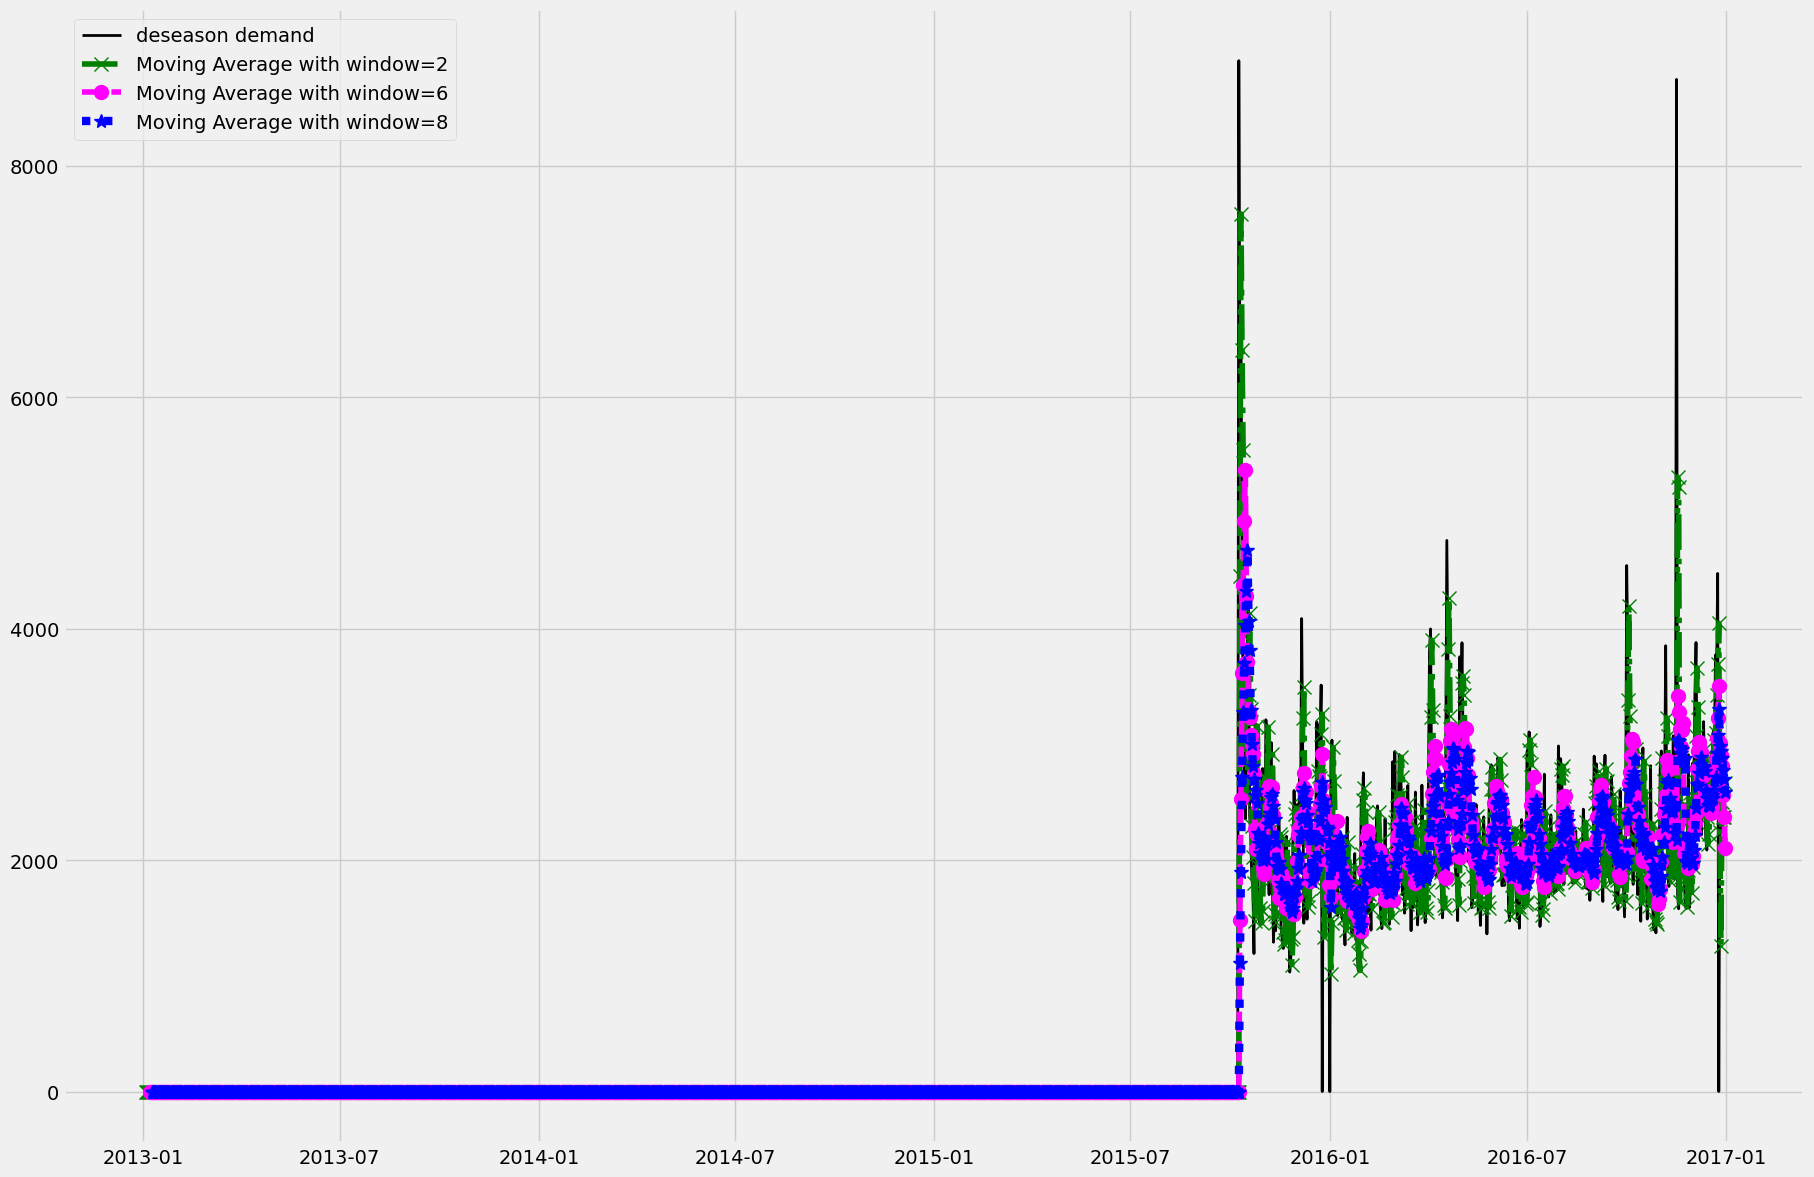

In [1244]:
deseason_sales_data_MA = deseason_sales_data.copy()
deseason_sales_data_MA['MA2'] = deseason_sales_data.deseason_sales.rolling(2).mean().shift()
deseason_sales_data_MA['MA6'] = deseason_sales_data.deseason_sales.rolling(6).mean().shift()
deseason_sales_data_MA['MA8'] = deseason_sales_data.deseason_sales.rolling(8).mean().shift()

plt.figure(figsize=(20,14))
plt.grid(True)
plt.plot(deseason_sales_data_MA['deseason_sales'],label='deseason demand', color='black',linewidth=2)
plt.plot(deseason_sales_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(deseason_sales_data_MA['MA6'],label='Moving Average with window=6',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(deseason_sales_data_MA['MA8'],label='Moving Average with window=8',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2)
plt.show()

In [1245]:
pred = deseason_sales_data_MA.iloc[12:]

MAD_MA2 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA2'].values))
MAD_MA6 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA6'].values))
MAD_MA8 = np.mean(np.absolute(pred['deseason_sales'].values - pred['MA8'].values))

print("MAD score for Moving average with Window size 2 is {:0.1f}\nMAD score for Moving average with Window size 6 is {:0.1f}\nMAD score for Moving average with Window size 8 is {:0.1f}".format(MAD_MA2,MAD_MA6,MAD_MA8))

MAD score for Moving average with Window size 2 is 165.8
MAD score for Moving average with Window size 6 is 172.8
MAD score for Moving average with Window size 8 is 163.8


In [1264]:
MA8_forecasted_deseason_sales = deseason_sales_data["deseason_sales"][-8:].mean()

MA8_forecasted_sales = df_new.iloc[-9:,:]
MA8_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)

a = MA8_forecasted_deseason_sales*sales_table["S Index"][0:9]
MA8_forecasted_sales["Forecasted sales"] = list(a)


MA8_forecasted_sales.reset_index()

,index,date,Forecasted sales
0,1452,2016-12-23,1911.235958
1,1453,2016-12-24,1909.805053
2,1454,2016-12-25,2199.999655
3,1455,2016-12-26,2627.596079
4,1456,2016-12-27,2430.829132
5,1457,2016-12-28,2107.723705
6,1458,2016-12-29,2317.962103
7,1459,2016-12-30,2213.436206
8,1460,2016-12-31,2306.235658


In [1265]:
df_new.reset_index(inplace=True)

In [1266]:
df_new[df_new['sales']>0]

,index,date,sales
358,358,2013-12-25,1.000
723,723,2014-12-25,1.000
1011,1011,2015-10-09,8909.000
1012,1012,2015-10-10,6260.000
1013,1013,2015-10-11,6558.000
...,...,...,...
1456,1456,2016-12-27,2479.516
1457,1457,2016-12-28,2272.151
1458,1458,2016-12-29,2475.973
1459,1459,2016-12-30,2858.963


In [1267]:
sds=MA8_forecasted_sales[['date','Forecasted sales']]

In [1268]:
sds.tail()

,date,Forecasted sales
1456,2016-12-27,2430.829132
1457,2016-12-28,2107.723705
1458,2016-12-29,2317.962103
1459,2016-12-30,2213.436206
1460,2016-12-31,2306.235658


In [1269]:
df_new['date'] = pd.to_datetime(df_new['date'], format='%Y-%m-%d')
sds['date'] = pd.to_datetime(sds['date'], format='%Y-%m-%d')


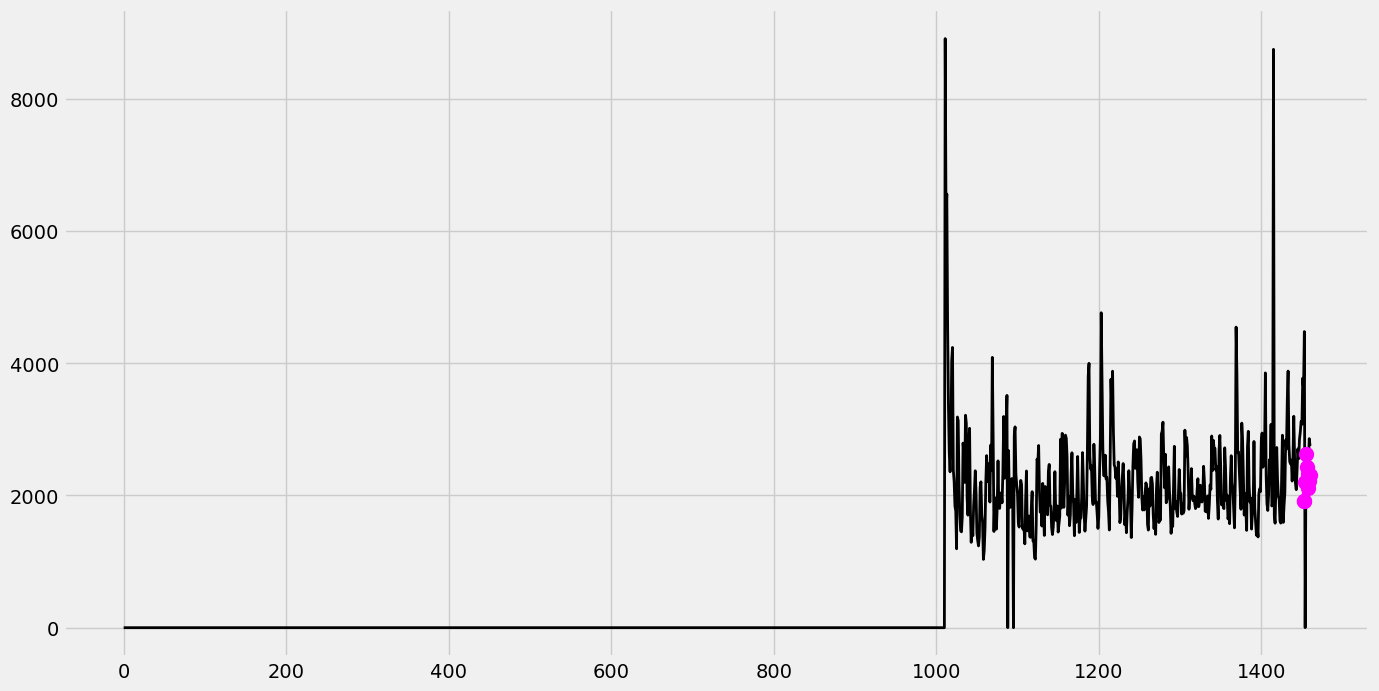

In [1270]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(df_new['sales'],label='sales', color='black',linewidth=2)
plt.plot(sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')
#plt.legend(loc=2)
plt.show()

In [1271]:

dfq=df_new[1440:]

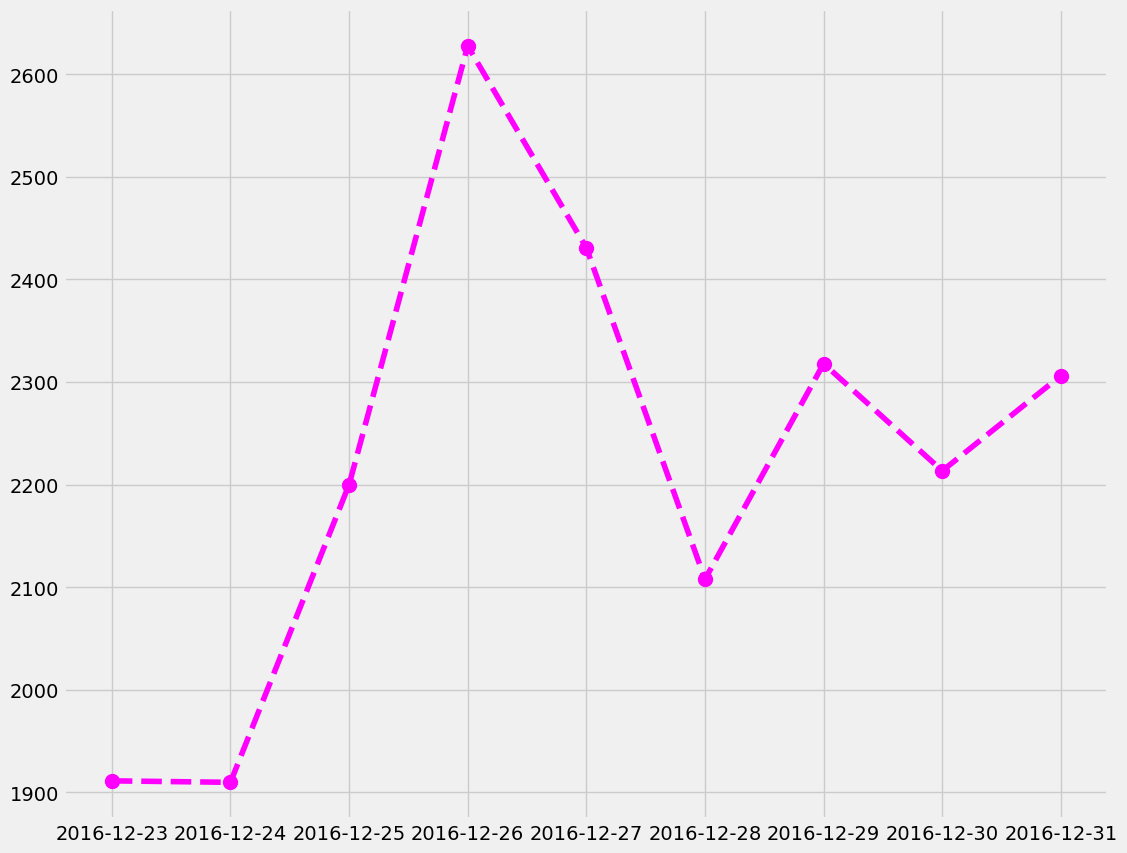

In [1272]:
plt.plot(sds['date'],sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')


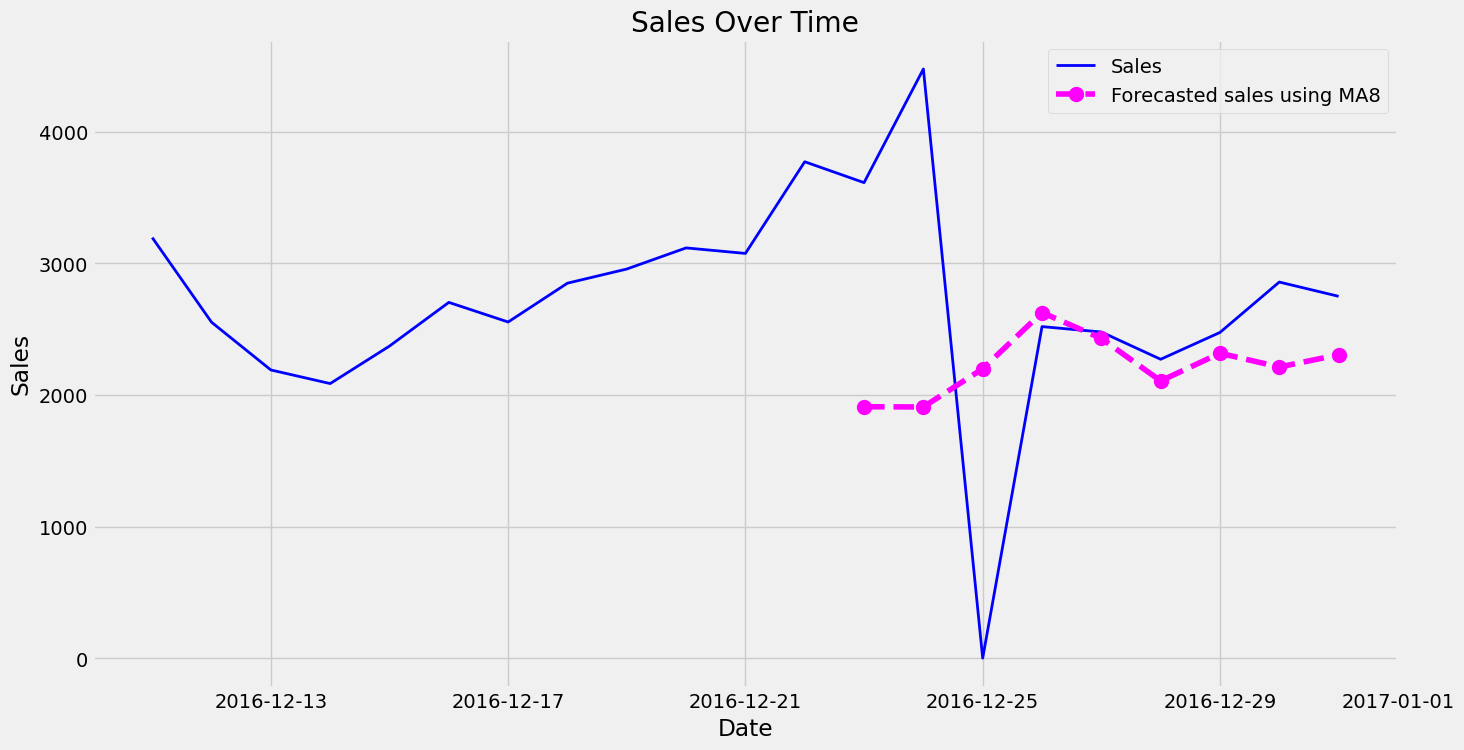

In [1273]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(15, 8))
plt.grid(True)
#dfq=df_new[]
plt.plot(dfq['date'], dfq['sales'], label='Sales', color='blue', linewidth=2)
#plt.plot(sds['date'],sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(sds['date'],sds["Forecasted sales"],label='Forecasted sales using MA8',marker='o', markersize=10, linestyle='dashed', color='magenta')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()


In [1274]:
MAD_MA8 = np.mean(np.absolute(MA8_forecasted_sales["Forecasted sales"].values - df_new['sales'][-9:].values))
MAD_MA8

893.1673243285456

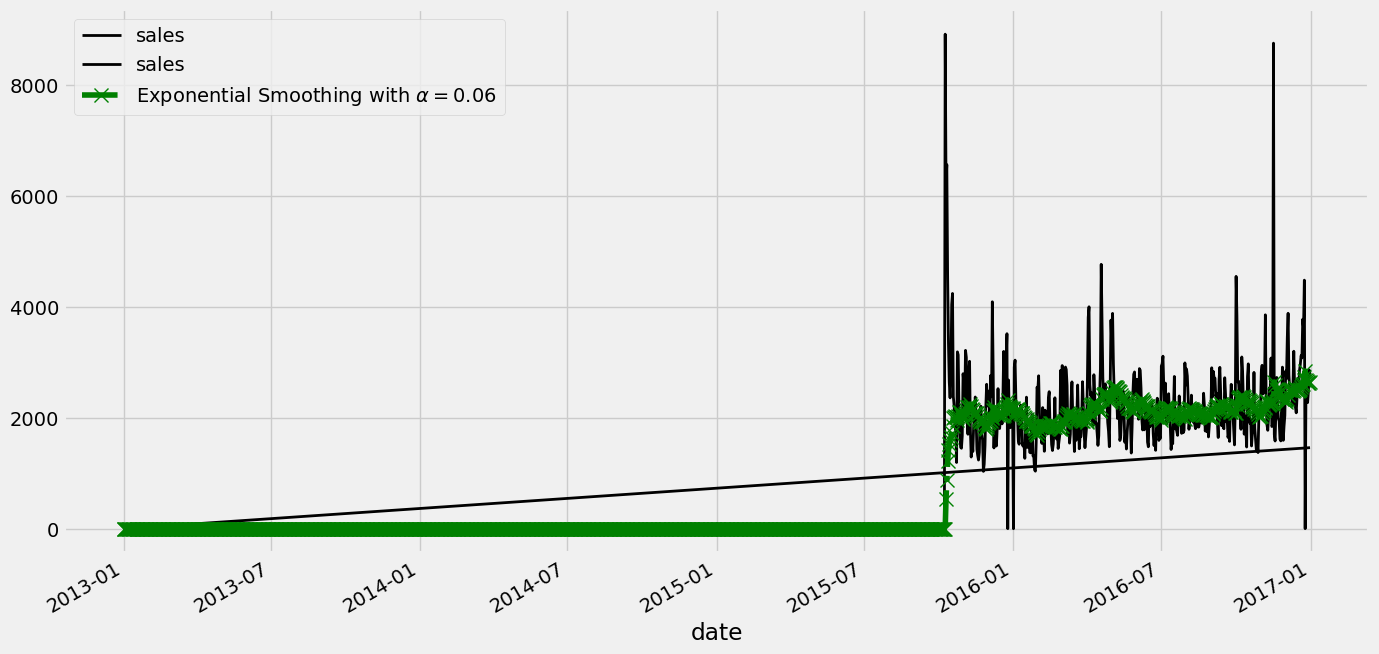

In [1275]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing

# Modify your data (assuming you have done the necessary data formatting)
df_new['date'] = pd.to_datetime(df_new['date'])
df_new.set_index('date', inplace=True)
df_new['sales'] = pd.to_numeric(df_new['sales'])

plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(df_new, label='sales', color='black', linewidth=2)

ES1 = SimpleExpSmoothing(df_new['sales']).fit(smoothing_level=0.06, optimized=False)
ES1.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$' % 0.06, marker='x', markersize=10, linestyle='dashdot', color='green')

# Repeat the above lines for ES2 and ES3 with different smoothing levels

plt.legend(loc=2)
plt.show()


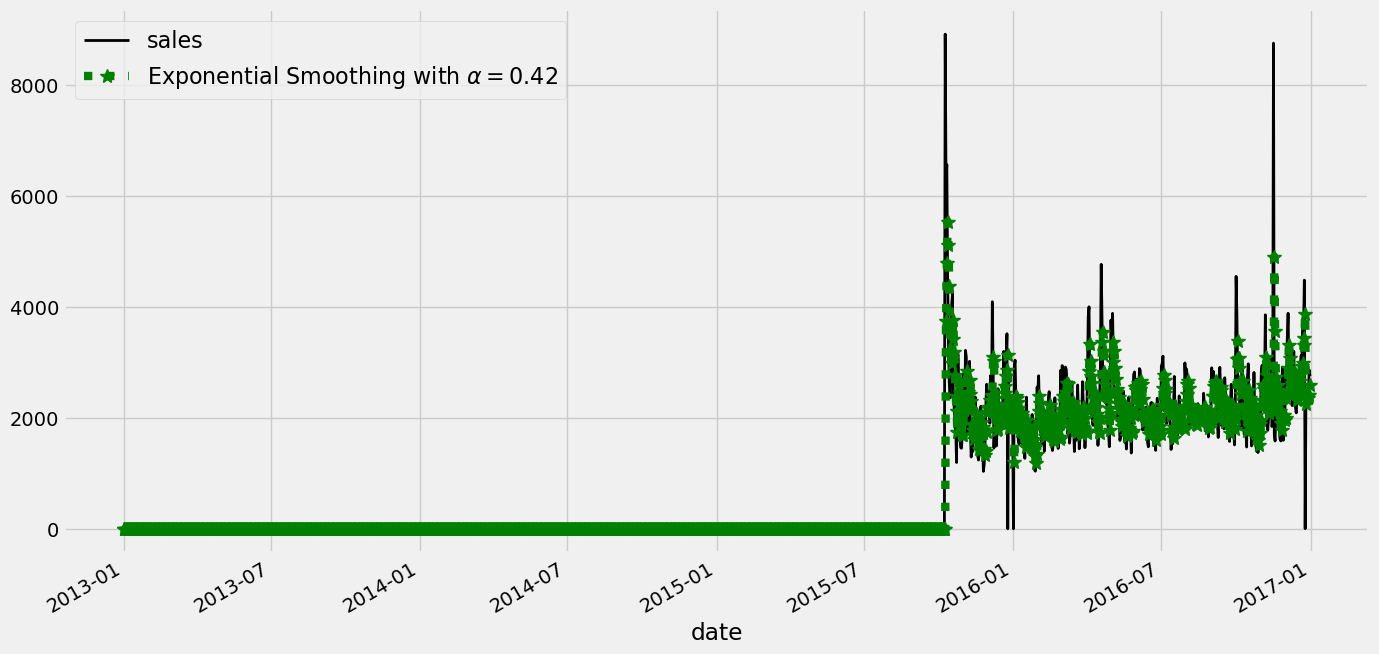

In [1281]:
plt.figure(figsize=(15,8))
plt.grid(True)

from statsmodels.tsa.api import  SimpleExpSmoothing

plt.plot(deseason_sales_data,label='sales', color='black',linewidth=2)


ES_best = SimpleExpSmoothing(deseason_sales_data).fit() # by default, python will find the best alpha!
best_alpha = ES_best.model.params['smoothing_level']

ES_best.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=${:0.2f}'.format(best_alpha), 
                          marker='*', markersize=10, linestyle='dotted', color='green',linewidth=6)

plt.legend(loc=2,prop={'size': 16})


plt.show()

In [1287]:
ES_forecasted_sales = df_new.iloc[-9:,:]
ES_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)


ES_forecasted_deseason_sales = ES_best.forecast()

b = ES_forecasted_deseason_sales.values[0]*sales_table["S Index"][0:9]
ES_forecasted_sales["Forecasted sales"] = list(b)

ES_forecasted_sales

,index,Forecasted sales
date,,
2016-12-23,1452,2050.614979
2016-12-24,1453,2049.079723
2016-12-25,1454,2360.437091
2016-12-26,1455,2819.216462
2016-12-27,1456,2608.100065
2016-12-28,1457,2261.431813
2016-12-29,1458,2487.002082
2016-12-30,1459,2374.853517
2016-12-31,1460,2474.420474


In [1292]:
df_new.tail()

,index,sales
date,,
2016-12-27,1456,2479.516
2016-12-28,1457,2272.151
2016-12-29,1458,2475.973
2016-12-30,1459,2858.963
2016-12-31,1460,2750.603


In [1290]:
wer=df_new[1440:]

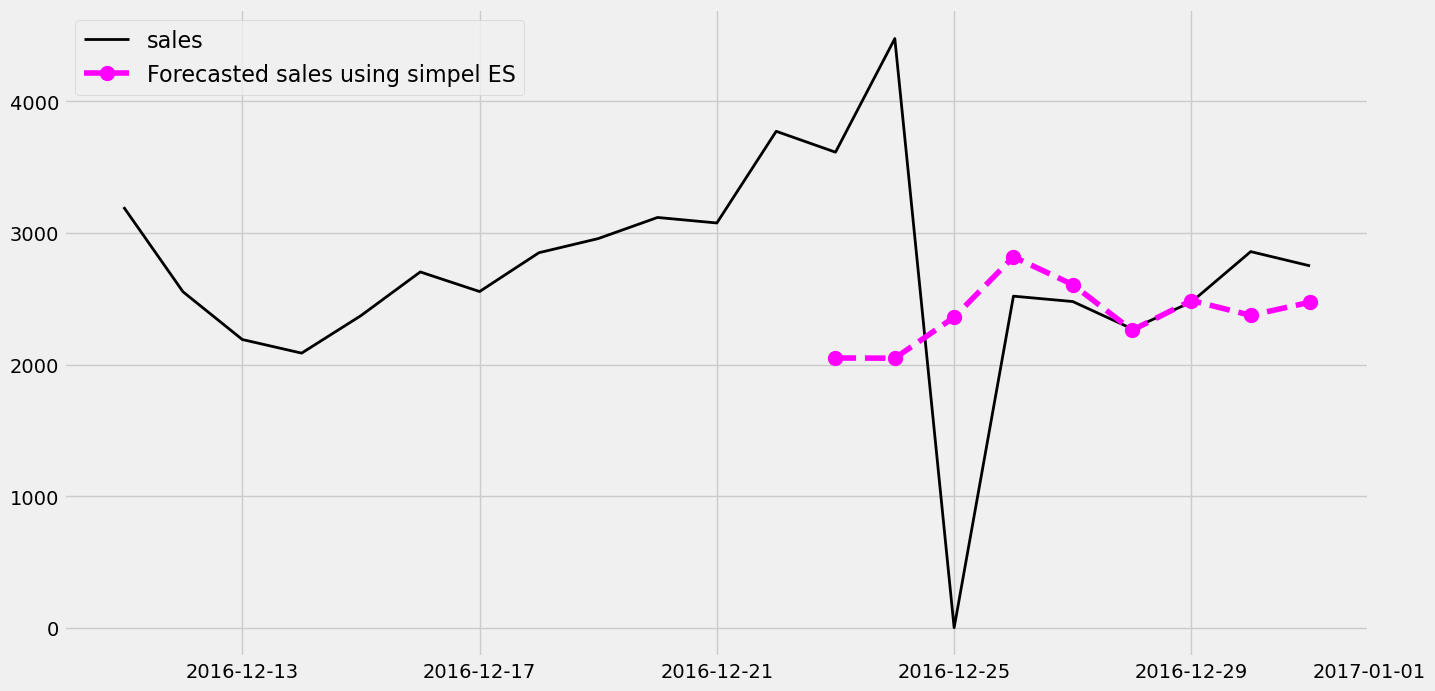

In [1291]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(wer['sales'],label='sales', color='black',linewidth=2)
plt.plot(ES_forecasted_sales["Forecasted sales"],label='Forecasted sales using simpel ES',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [1294]:
MAD_ES = np.mean(np.absolute(ES_forecasted_sales["Forecasted sales"].values - demand_data['sales'][-9:].values))
round(MAD_ES,2)

1928.06

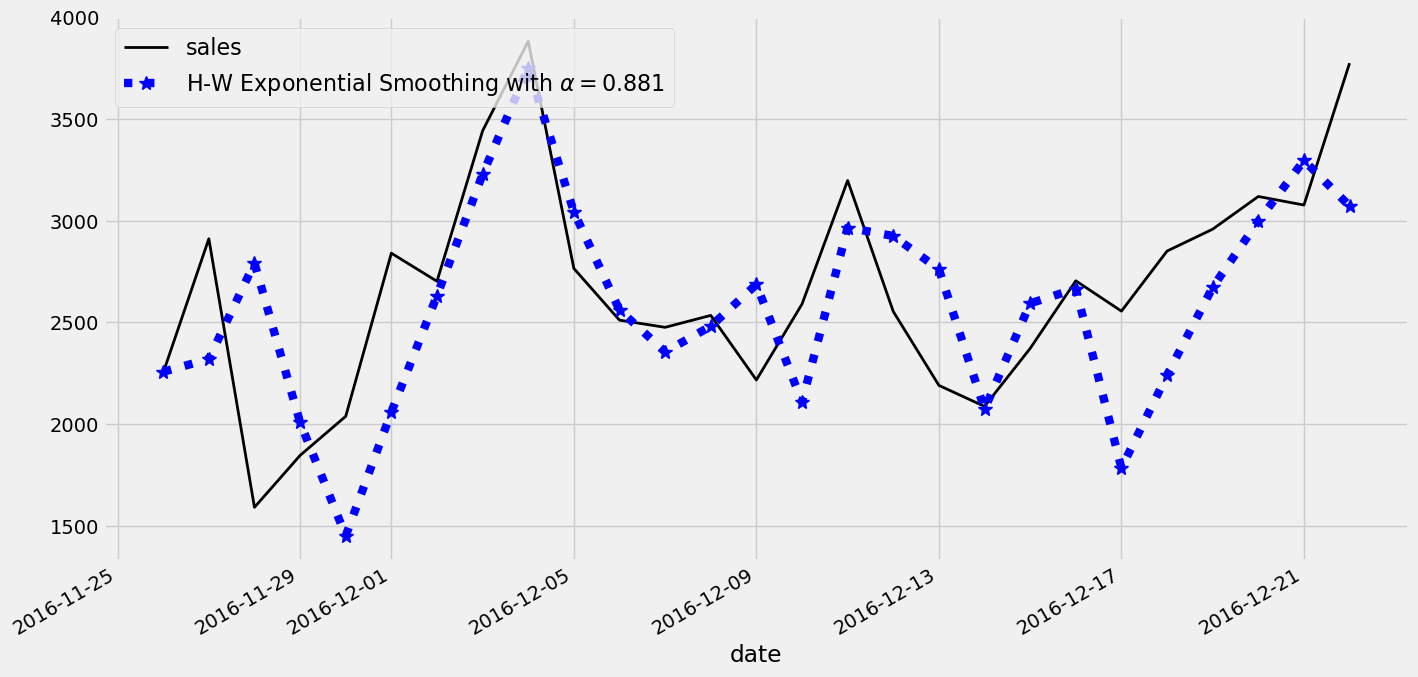

In [1330]:
plt.figure(figsize=(15,8))
plt.grid(True)

train_data = df_new.iloc[-36:-9,:]
train_data.drop('index',axis=1,inplace=True)
plt.plot(train_data,label='sales', color='black',linewidth=2)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#H_W_model = ExponentialSmoothing(train_data.astype(np.float), trend="add", seasonal="add", seasonal_periods=12)
H_W_model = ExponentialSmoothing(train_data.astype(float), trend="add", seasonal="add", seasonal_periods=12)

H_W_fit = H_W_model.fit()

best_H_W_alpha = H_W_fit.model.params['smoothing_level']

H_W_fit.fittedvalues.plot(label=r'H-W Exponential Smoothing with $\alpha=%0.3f$'%best_H_W_alpha,
                          marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2,prop={'size': 16})


plt.show()

In [1335]:
HES_forecasted_sales = df_new.iloc[-9:,:]
HES_forecasted_sales.rename(columns={"sales": "Forecasted sales"}, inplace=True)

HES_forecasted_sales["Forecasted sales"] = H_W_fit.forecast(9)

HES_forecasted_sales

,index,Forecasted sales
date,,
2016-12-23,1452,4202.994355
2016-12-24,1453,4002.920871
2016-12-25,1454,4259.125315
2016-12-26,1455,4249.402178
2016-12-27,1456,4885.727544
2016-12-28,1457,5324.105599
2016-12-29,1458,4604.625278
2016-12-30,1459,4474.788765
2016-12-31,1460,4411.779714


In [1340]:
wer=df_new[1440:]

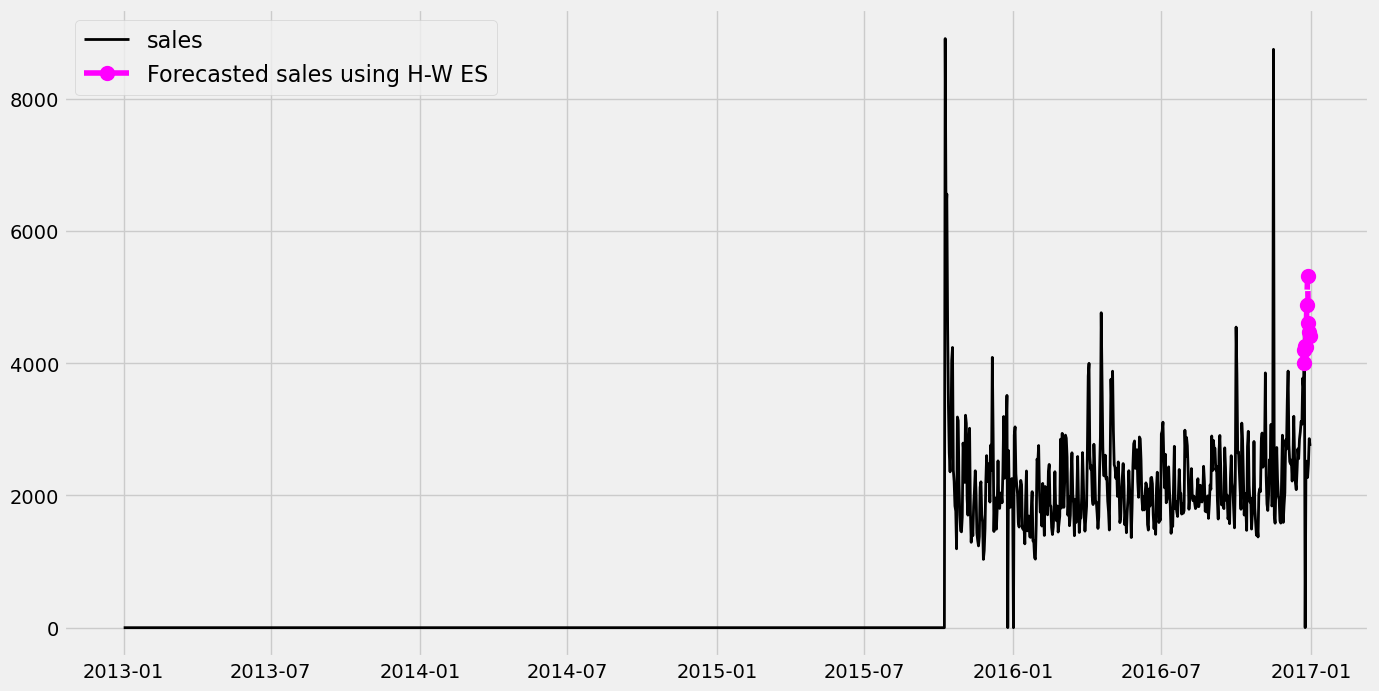

In [1341]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(df_new['sales'], label='sales', color='black',linewidth=2)
plt.plot(HES_forecasted_sales["Forecasted sales"],label='Forecasted sales using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

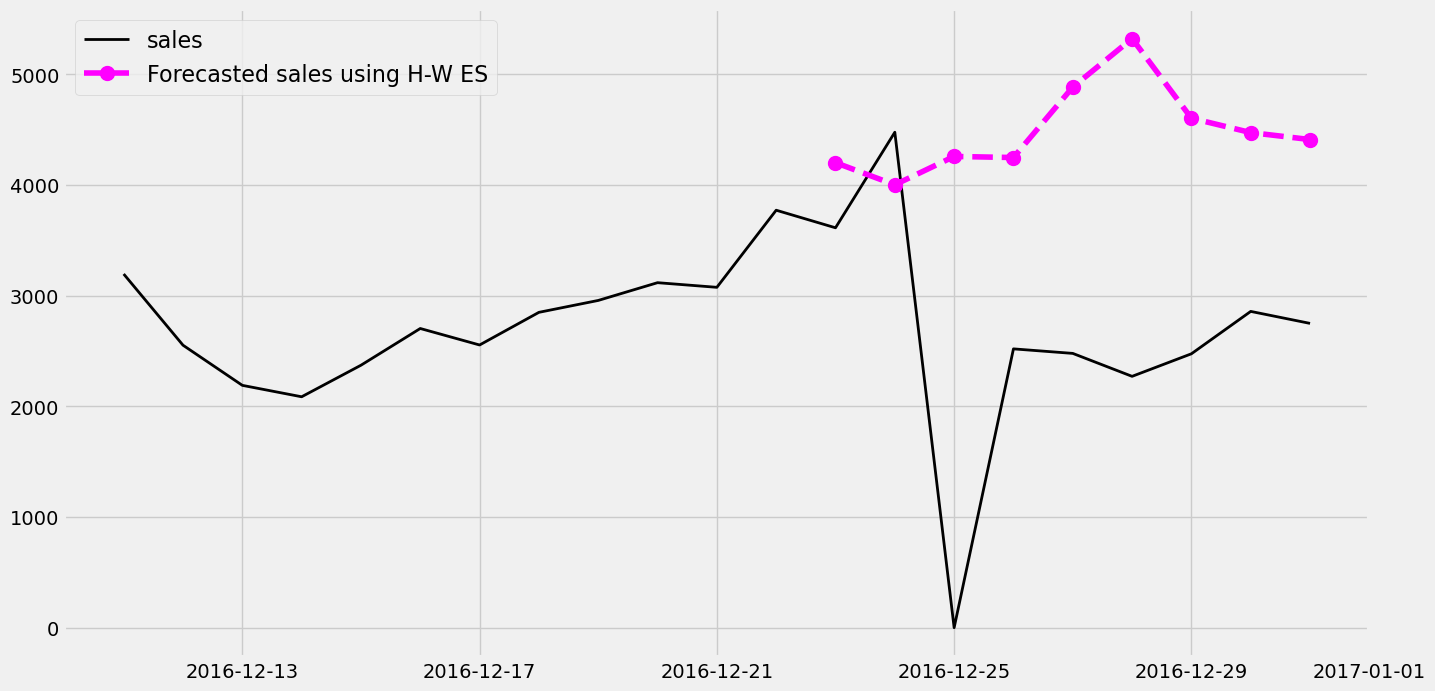

In [1343]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(wer['sales'], label='sales', color='black',linewidth=2)
plt.plot(HES_forecasted_sales["Forecasted sales"],label='Forecasted sales using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [1345]:
MAD_HES = np.mean(np.absolute(HES_forecasted_sales["Forecasted sales"].values - demand_data['sales'][-9:].values))
round(MAD_HES,2)

4031.43

In [1354]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'sales' is the name of the column containing sales data in your DataFrame.
train_final = df_new['sales'].iloc[-36:]

# If needed, you can convert it to a numpy array
# train_final = train_final.to_numpy()

# Now you can create the ExponentialSmoothing model
model_final = ExponentialSmoothing(train_final, trend="add", seasonal="add", seasonal_periods=12)

fit_final = model_final.fit()
forecast = round(fit_final.forecast(3), 1)

